## 2. Clase práctica - Análisis de datos con Pandas - Parte 1

## Para realizar esta NB deben tener los datasets data1 y data2 en formato csv.

**Importamos librerias que vamos a usar en toda la NB**

In [112]:
import pandas as pd #Pandas para trabajar con dataframes
import numpy as np

import warnings
warnings.filterwarnings("ignore") #Ignorar warnings

### Importar los dataframes.

**Llamar al data1.csv "df" y al data2 "df_variables"**. 

In [113]:
# dataset = pd.read_csv("/ruta/donde/esta/el/df/nombre_dataframe.csv")

df = pd.read_csv("data1.csv")

df_variables = pd.read_csv("data2.csv")

In [114]:
df.columns.tolist()

['Unnamed: 0',
 'rut',
 'periodo',
 'ind_activo',
 'estado_solicitud',
 'captacion',
 'cant_tel',
 'predictor1_6',
 'marca_60d_6m_final']

### Detalles de la data:

**Es importante destacar que no importa mucho que significa cada variable en esta NB, ya que el objetivo principal es que puedan realizar los ejercicios y entender cómo funciona pandas**.

No obstante, les dejamos una breve descripción de algunos atributos en caso que lo necesiten.

- rut = ID de cada observación.
- Periodo = periodo de cada observación.
- Los campos rut y periodo son las claves por las cuales los registros son únicos, es decir que no hay duplicados con mismo rut y periodo.
- ind_activo: Informacion si el cliente se encuentre activo.
- estado_solicitud: estado en el que se encuentra la solcitud del cliente.
- captacion: metodo de captacion por el cual fue captado el cliente.
- marca_6m_60d_final: 1 si el cliente es malo y 0 si es bueno.
- etc.

#### Si importaron el dataset y les quedo la columna "Unnamed: 0". Eliminarla usando drop

**Atentos a no olvidarse el inplace=True!!**

In [115]:
df.drop(columns=['Unnamed: 0'], inplace=True)

df_variables.drop(c### Detalles de la data:

**Es importante destacar que no importa mucho que significa cada variable en esta NB, ya que el objetivo principal es que puedan realizar los ejercicios y entender cómo funciona pandas**.

No obstante, les dejamos una breve descripción de algunos atributos en caso que lo necesiten.

- rut = ID de cada observación.
- Periodo = periodo de cada observación.
- Los campos rut y periodo son las claves por las cuales los registros son únicos, es decir que no hay duplicados con mismo rut y periodo.
- ind_activo: Informacion si el cliente se encuentre activo.
- estado_solicitud: estado en el que se encuentra la solcitud del cliente.
- captacion: metodo de captacion por el cual fue captado el cliente.
- marca_6m_60d_final: 1 si el cliente es malo y 0 si es bueno.
- etc.

#### Si importaron el dataset y les quedo la columna "Unnamed: 0". Eliminarla usando drop

**Atentos a no olvidarse el inplace=True!!**olumns=['Unnamed: 0'], inplace=True)

### 1) Realizar Sanity check de la data.

Para este primer punto, utilizar el dataset df que hace referencia al **data1.csv.** No obstante, si quieren realizarlo en ambos, nunca esta demás.

**Funciones Útiles**

* .head()
* .info()
* .shape
* .dtypes
* .describe
* .isna()
* .sum()
* .unique()
* .nunique()
* .value_counts()

#### 1.1) Observar las primeras 5 filas del dataset "df".

In [116]:
# Observar las primeras N filas de un df (por default muestra las primeras 5)
df.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0


#### 1.2) Observar las últimas 5 filas del dataset "df".

In [117]:
# Observar las ultimas N filas de un df (por default muestra las ultimas 5)
df.tail()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final
9995,aaoBjnEivN,201909.0,0.0,Rechazado,NORMAL,4.0,350.0,1.0
9996,ydTWpQrnQV,201912.0,1.0,Aprobado,NORMAL,3.0,605.0,0.0
9997,gE0FksUKBV,202003.0,1.0,Aprobado,EXPRESS,1.0,805.0,0.0
9998,5Vf8evWasd,201905.0,1.0,Aprobado,EXPRESS,5.0,387.0,0.0
9999,WP6QjuqjbW,201908.0,1.0,Aprobado,EXPRESS,8.0,410.0,0.0


#### 1.3) Obtener información general del dataframe utilizando .info()

In [118]:
# Informacion general del df y todas sus columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rut                 10000 non-null  object 
 1   periodo             10000 non-null  float64
 2   ind_activo          10000 non-null  float64
 3   estado_solicitud    10000 non-null  object 
 4   captacion           10000 non-null  object 
 5   cant_tel            10000 non-null  float64
 6   predictor1_6        6904 non-null   float64
 7   marca_60d_6m_final  10000 non-null  float64
dtypes: float64(5), object(3)
memory usage: 625.1+ KB


#### 1.4) Obtener dimensiones del dataframe (filas y columnas).

In [119]:
# Dimensiones del df (filas y columnas)
df.shape

(10000, 8)

#### 1.5) Obtener tipo de datos de las columnas

In [120]:
# Tipo de datos de las columnas
df.dtypes

rut                    object
periodo               float64
ind_activo            float64
estado_solicitud       object
captacion              object
cant_tel              float64
predictor1_6          float64
marca_60d_6m_final    float64
dtype: object

#### 1.6) Seleccionar las columnas ind_activo, estado_solicitud y cant_tel y realizar un .head()

In [121]:
# Seleccionar columnas
df[['ind_activo','estado_solicitud','cant_tel']].head()

,ind_activo,estado_solicitud,cant_tel
0,0.0,Rechazado,1.0
1,1.0,Aprobado,4.0
2,1.0,Aprobado,3.0
3,1.0,Aprobado,4.0
4,1.0,Aprobado,0.0


#### 1.7) Observar la distribucion de estas 3 variables utilizando el método describe()

In [122]:
# Observar distribucion de las variables -> describe()
df[['ind_activo','estado_solicitud','cant_tel']].describe()

,ind_activo,cant_tel
count,10000.00000,10000.000000
mean,0.68600,2.680800
std,0.46414,2.132831
min,0.00000,0.000000
25%,0.00000,1.000000
50%,1.00000,2.000000
75%,1.00000,4.000000
max,1.00000,34.000000


#### 1.8) Chequear cantidad de valores nulos por columna.

**Pista:** Utilizar isna() y luego la suma de ello para obtener los valores por columna.

In [123]:
# Detectar nulos en una columna 
df.isna().sum()

rut                      0
periodo                  0
ind_activo               0
estado_solicitud         0
captacion                0
cant_tel                 0
predictor1_6          3096
marca_60d_6m_final       0
dtype: int64

#### 1.9) Calcular el valor de nulos en %.

**Pista:** Dividir el bloque de codigo anterior por la cantidad de filas en el dataframe.

In [124]:
pd.DataFrame(df.isna().sum() / df.shape[0], columns = ["%Nulos"])

,%Nulos
rut,0.0000
periodo,0.0000
ind_activo,0.0000
estado_solicitud,0.0000
captacion,0.0000
cant_tel,0.0000
predictor1_6,0.3096
marca_60d_6m_final,0.0000


#### 1.9) Obtener la cantidad de valores únicos en las columnas categoricas.

- Primero seleccionar las columnas categoricas
- Luego correr nunique() en cada una **Fijarse de agregar el parametro dropna=False para tener en cuenta nulos**
- Luego si quieren con unique() pueden ver cuales son aquellos valores únicos.

In [125]:
#Variables categoricas

cat_df = df.select_dtypes("O").columns

df[cat_df].nunique(dropna=False)

rut                 9991
estado_solicitud       2
captacion              2
dtype: int64

#### 1.10) Calcular la distirbución por la variable captacion (cuantos registros hay por cada valor unico de captacion).

Utilizar la funcion value_counts() y tener en cuenta dropna.

In [126]:
df.captacion.value_counts(dropna=False)

EXPRESS    5879
NORMAL     4121
Name: captacion, dtype: int64

Si lo queremos ver en %.

In [127]:
df.captacion.value_counts(1, dropna=False)

EXPRESS    0.5879
NORMAL     0.4121
Name: captacion, dtype: float64

### 2) Tratamiento de Datos

#### 2.1) Imputacion de nulos 

Para esta parte vamos a usar el dataset "df_variables" que hace referencia al data2.csv

#### Imputar las columnas predictor1_7 y predictor1_9 por el valor 100. 

Primero chequear que tengan nulos.

**Pista:** Utilizar fillna()

In [128]:
# Definimos las columnas que queremos imputar
cols_to_impute = ['predictor1_7','predictor1_9']

In [129]:
# Nulos antes de imputar
df_variables[cols_to_impute].isna().sum()

predictor1_7    3462
predictor1_9    4244
dtype: int64

In [130]:
# Imputamos con un valor hardcodeado
df_variables[cols_to_impute] = df_variables[cols_to_impute].fillna(value=100)

In [131]:
# Observamos nulos DESPUES de imputar
df_variables[cols_to_impute].isna().sum()

predictor1_7    0
predictor1_9    0
dtype: int64

#### Imputar las columnas predictor1_10 y predictor1_11 por la media de cada columna.

Primero chequear que tengan nulos.

**Pista:** Utilizar fillna()

In [132]:
# Definimos las columnas que queremos imputar
cols_to_impute = ['predictor1_10','predictor1_11']

# Observamos los nulos ANTES de imputar
df_variables[cols_to_impute].isna().sum()

df_variables['predictor1_10'].fillna(df_variables['predictor1_10'].mean(), inplace=True)

df_variables['predictor1_11'].fillna(df_variables['predictor1_11'].mean(), inplace=True)

# Observamos los nulos DESPUES de imputar
df_variables[cols_to_impute].isna().sum()

predictor1_10    0
predictor1_11    0
dtype: int64

#### 2.2) Tratamiento strings: upper, lower, replace

Para esta parte vamos a usar el dataset "df" que hace referencia al **data1.csv**

Muchas veces hay que realizar cambios en variables que vienen como string, por ejemplo, llevar todo a mayúsculas, minúsculas, reemplazar un simbolo, dividir por algún valor (*split*), etc. Pandas trae incorporada distintas funciones que nos ayudan a cumplir estas tareas. La forma de acceder a estas funciones es la siguiente:

``` pd.Series.str.#funcion```

``` tu_df.tu_columna.str.upper()```


#### Convertir los valores de captacion a letra miniscula.

Se puede hacer con str.lower() o con una funcion lambda x luego de aplicar un apply.

In [133]:
#convertimos los valores a minusculas
df.captacion = df.captacion.str.lower()
df.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final
0,PlDKtWGFBg,201909.0,0.0,Rechazado,normal,1.0,596.0,1.0
1,MOAbr9v9ac,201810.0,1.0,Aprobado,express,4.0,NaN,0.0
2,49L1vb3c2I,201909.0,1.0,Aprobado,normal,3.0,633.0,0.0
3,7xM1iIFNCb,201812.0,1.0,Aprobado,express,4.0,NaN,0.0
4,e2ayZYSD59,201809.0,1.0,Aprobado,normal,0.0,NaN,0.0


#### Convertir los valores de vuelta a mayusculas

In [134]:
df.captacion = df.captacion.str.upper()
df.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0


####  Ahora, si reemplazar algún simbolo por podemos usar la funcion ```str.replace```, la cual toma un substring y lo convierte en otro.
Por ejemplo, reemplazar todas las "ex" por otro string en la columna ```captacion```

In [135]:
df['captacion_nuevo'] = df.captacion.str.replace('EX','VOLDEMORT')
df.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL


#### 2.3) Tratamiento de duplicados .   

**Tener en cuenta que este tema no se dio en la NB teórica pero los ejercicios pueden ser realizados si investigan un poco. No obstante, no se preocupen si no los pueden realizar ya que serán explicados en la clase práctica tambien.**

Seguimos utilizando el **data1 (df).**

#### Chequear cantidad de duplicados de las columnas estado_solicitud y periodo.

In [136]:
for col in ["estado_solicitud", "periodo"]:
    print("La columna {} tiene {} registros duplicados.".format(col, df[col].duplicated().sum()))

La columna estado_solicitud tiene 9998 registros duplicados.
La columna periodo tiene 9979 registros duplicados.


#### Chequear si tenemos duplicados por rut y periodo. Utilizar subset como parametro en la funcion duplicated.

In [137]:
df.duplicated(subset=['rut', 'periodo']).sum()

0

**En la clase practica veremos como dropear duplicados**

#### 2.4) Seleccion de distintas variables y filas.

Utilizar el dataset df

#### Seleccionar las columnas rut, periodo y captacion, en donde captacion sea EXPRESS.

In [138]:
#Opcion 1 usando loc
df.loc[df.captacion == "EXPRESS", ['rut', 'periodo', 'captacion']]

,rut,periodo,captacion
1,MOAbr9v9ac,201810.0,EXPRESS
3,7xM1iIFNCb,201812.0,EXPRESS
6,6NhaGuat01,201906.0,EXPRESS
7,kC6MdTAGmL,201911.0,EXPRESS
9,frKoYseHIt,201906.0,EXPRESS
...,...,...,...
9992,KN29yqqCuF,201807.0,EXPRESS
9994,LG4kY7IgZN,201809.0,EXPRESS
9997,gE0FksUKBV,202003.0,EXPRESS
9998,5Vf8evWasd,201905.0,EXPRESS


In [139]:
#Opcion 2
df[df.captacion == "EXPRESS"][['rut', 'periodo', 'captacion']]

,rut,periodo,captacion
1,MOAbr9v9ac,201810.0,EXPRESS
3,7xM1iIFNCb,201812.0,EXPRESS
6,6NhaGuat01,201906.0,EXPRESS
7,kC6MdTAGmL,201911.0,EXPRESS
9,frKoYseHIt,201906.0,EXPRESS
...,...,...,...
9992,KN29yqqCuF,201807.0,EXPRESS
9994,LG4kY7IgZN,201809.0,EXPRESS
9997,gE0FksUKBV,202003.0,EXPRESS
9998,5Vf8evWasd,201905.0,EXPRESS


#### Seleccionar filas donde captacion es EXPRESS y estado solicitud Aprobado.

In [140]:
df[(df.captacion == "EXPRESS") & (df.estado_solicitud == "Aprobado")]

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
6,6NhaGuat01,201906.0,1.0,Aprobado,EXPRESS,4.0,649.0,1.0,VOLDEMORTPRESS
7,kC6MdTAGmL,201911.0,1.0,Aprobado,EXPRESS,0.0,802.0,0.0,VOLDEMORTPRESS
9,frKoYseHIt,201906.0,0.0,Aprobado,EXPRESS,1.0,652.0,0.0,VOLDEMORTPRESS
...,...,...,...,...,...,...,...,...,...
9992,KN29yqqCuF,201807.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
9994,LG4kY7IgZN,201809.0,1.0,Aprobado,EXPRESS,3.0,NaN,0.0,VOLDEMORTPRESS
9997,gE0FksUKBV,202003.0,1.0,Aprobado,EXPRESS,1.0,805.0,0.0,VOLDEMORTPRESS
9998,5Vf8evWasd,201905.0,1.0,Aprobado,EXPRESS,5.0,387.0,0.0,VOLDEMORTPRESS


#### Seleccionar filas donde captacion es NORMAL, estado solicitud es Aprobado y el ind_activo es = 1. Sólo seleccionar las columnas rut, periodo, cant tel y ordenar de mayor a menor por cant_tel.

In [141]:
df.loc[(df.captacion == "NORMAL") & 
       (df.estado_solicitud == "Aprobado") & 
       (df.ind_activo == 1), ['rut', 'periodo', 'cant_tel']].sort_values(by="cant_tel", ascending=False)


,rut,periodo,cant_tel
1820,4KAO8pVk4T,201812.0,14.0
3873,EUk97mwmXj,201902.0,13.0
9179,0lrxehS2CI,201910.0,11.0
1309,XhEqwqycik,201902.0,11.0
6965,v2YNZ145e0,201904.0,10.0
...,...,...,...
8216,2KdEdqnIRm,202002.0,0.0
3090,BOMmrHnzaB,201807.0,0.0
1933,5WWIa0KY7s,201904.0,0.0
8190,2T3uB78iLa,201808.0,0.0


### 3) Joineo de tablas

#### MERGE

**3.1) Joineemos los dos dataframes que tenemos, por las claves de fusion que serán rut y periodo.**

Crear un dataset que se llame df_nuevo que sea un inner join entre df y df_variables. **Usar pd.merge**

In [142]:
df_nuevo = pd.merge(df, df_variables, on=['rut', 'periodo'], how='inner')

df_nuevo.head()

#df_nuevo = df.merge(df_variables,...).merge()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,predictor1_7,predictor1_8,predictor1_9,predictor1_10,predictor1_11,predictor1_12,ignite_ise,ind_compra_paga
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,551.0,506.0,506.0,640.000000,681.000000,640.0,D,0.0
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,582.519234,586.224898,NaN,C3,0.0
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,544.0,675.0,675.0,749.000000,749.000000,749.0,D,0.0
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,582.519234,586.224898,NaN,E,0.0
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,100.0,NaN,100.0,582.519234,586.224898,NaN,E,0.0


**3.1 bis)**
Con el .head() podemos ver que el nuevo df contiene nuevas variables, las que agregamos desde df_variables. Vemos también que las variables que fueron clave de fusion no se duplicaron, lo cual es bueno. 

**Ahora ¿ Qué pasa si las claves de fusion se llaman distinto? Utilizar left_on y right_on**

A pesar de que las variables se llaman, y el código debajo no haria falta en este caso, muchas veces se van a encontrar con distintos nombres de claves de fusion.

In [143]:
df_nuevo = df.merge(df_variables, left_on=['rut', 'periodo'], right_on=['rut', 'periodo'], 
                               how='inner')

**3.2) Realizar un left join pero sólo trayendo algunas variables del dataset df_variables:
'predictor1_7', 'predictor1_8', 'predictor1_9', 'ignite_ise'** . El left join debe ser sobre el dataset df, es decir, que el left seria df y el right df_variables.

Llamar a este dataframe df_merge.

In [144]:
#Realizar left_join 

df_merge = pd.merge(df, df_variables[['rut', 'periodo', 'predictor1_7', 'predictor1_8', 'predictor1_9', 'ignite_ise']]
                                     , left_on=['rut', 'periodo'], right_on=['rut', 'periodo'], 
                               how='left')

df_merge.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,predictor1_7,predictor1_8,predictor1_9,ignite_ise
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,551.0,506.0,506.0,D
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,C3
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,544.0,675.0,675.0,D
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,E
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,100.0,NaN,100.0,E


**Chequear shape del nuevo dataset para ver si se hizo correctamente o tenemos duplicados**

In [145]:
display(df.shape,df_merge.shape)

df.head()

(10000, 9)

(10000, 13)

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL


### 4) Agrupación

Para realizar agrupaciones, las 2 maneras más comunes son groupby y pivot_table. A pesar de que pivot_table no fue detallado en las NB de teoria, acá explicaremos un poco para que puedan realizar algunos ejercicios utilizando esta herramienta.

### Pivot table

Pivot table es otra forma de realizar group by, la cuál es muy facil de entender si estamos acostumbrados a trabajar con tablas dinamicas en excel.

**Código:**

```pd.pivot_table(data, index='variable o variables indice', columns='variable o variables de columna', values='variable sobre la cual se va a calcular suma/cuenta/media/..., aggfunc='funciones de agregación que se van a apicar a cada variable')```


```pd.pivot_table(
    data,
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)```

**Ejemplo - calcular la bad rate (mean de marca_60d_6m_final) por periodo y la cantidad de registros:**

Podemos ver que no usaremos parametro "column" ya que no hace falta, porque estamos agrupando por periodo y caluculando la media de marca malo (bad rate) y la cuenta de registros (0 y 1) por periodo.

In [146]:
pd.pivot_table(df_merge, index='periodo', values='marca_60d_6m_final', aggfunc=['mean', 'count', 'sum']).head()

,mean,count,sum
,marca_60d_6m_final,marca_60d_6m_final,marca_60d_6m_final
periodo,,,
201807.0,0.149378,482,72.0
201808.0,0.166667,468,78.0
201809.0,0.216802,369,80.0
201810.0,0.175153,491,86.0
201811.0,0.206897,493,102.0


**Ejemplo 1) - Queremos ver la cantidad de malos y buenos por periodo**

In [147]:
pd.pivot_table(df_merge, index='periodo', columns='marca_60d_6m_final', values='rut', aggfunc='count').head()

marca_60d_6m_final,0.0,1.0
periodo,,
201807.0,410,72
201808.0,390,78
201809.0,289,80
201810.0,405,86
201811.0,391,102


Acá vemos que agregamos el parametro columna ya que queremos que cuente separando por marca malo (0 o 1). Como values pusimos rut ya que es una columna sin nulos que nos sirve para hacer el count.

**Ejemplo 2) - agrupar por periodo (indice), ver por captacion (columnas) sobre las columnas rut (count) y cant_tel (media).**

In [148]:
pd.pivot_table(df_merge, index='periodo', columns='captacion', values=['rut', 'cant_tel'],
              aggfunc={'rut':'count',
                      'cant_tel':'mean'}).head()

cant_tel               rut       
captacion   EXPRESS    NORMAL EXPRESS NORMAL
periodo                                     
201807.0   2.752688  2.029557     279    203
201808.0   2.850365  2.237113     274    194
201809.0   2.788546  2.169014     227    142
201810.0   2.752809  1.901786     267    224
201811.0   2.777778  2.038793     261    232

Vemos que para mapear variable en values con la funcion, creamos un diccionario en aggfunc y elegimos que metrica calcularle a cada uno.

**Otra forma de verlo es sin usar el parametro columna** - Esto va a ser más util para crear un nuevo dataframe.

In [149]:
pd.pivot_table(df_merge, index=['periodo','captacion'], values=['rut', 'cant_tel'],
              aggfunc={'rut':'count',
                      'cant_tel':'mean'}).head()

cant_tel  rut
periodo  captacion               
201807.0 EXPRESS    2.752688  279
         NORMAL     2.029557  203
201808.0 EXPRESS    2.850365  274
         NORMAL     2.237113  194
201809.0 EXPRESS    2.788546  227

**La importancia de .reset_index()**

Es muy importante destacar que si vamos a querer crear un dataset con la agrupacion realizada, es IMPRESCINDIBLE usar .reset_index() al final del codigo, ya que sino no quedara en el formato correcto.

Miremos el ejemplo de arriba aplicando reset_index()

In [150]:
pd.pivot_table(df_merge, index=['periodo','captacion'], values=['rut', 'cant_tel'],
              aggfunc={'rut':'count',
                      'cant_tel':'mean'}).reset_index().head()

,periodo,captacion,cant_tel,rut
0,201807.0,EXPRESS,2.752688,279
1,201807.0,NORMAL,2.029557,203
2,201808.0,EXPRESS,2.850365,274
3,201808.0,NORMAL,2.237113,194
4,201809.0,EXPRESS,2.788546,227


**Ejercicio Práctico utilizando pivot_table**

Agrupar por captacion y obtener la media y el desvio de cant_tel. Para esto crear un nuevo dataset que se llame: info_captacion.

Una vez obtenido esto, joinear la nueva columna al df_merge con un left_join (clave de fusion='captacion'). 

Pista: Para esto una vez obtenido el df info_captacion, debemos renombrar las columnas de manera correcta.

``` info_captacion.columns = ['captacion', 'mean_cant_tel', 'std_cant_tel'] ```

In [151]:
info_captacion = pd.pivot_table(df_merge, index='captacion', values='cant_tel', aggfunc=['mean', 'std']).reset_index()
info_captacion.columns = ['captacion', 'mean_cant_tel', 'std_cant_tel']
info_captacion.head()

,captacion,mean_cant_tel,std_cant_tel
0,EXPRESS,3.038442,2.181354
1,NORMAL,2.170590,1.951541


In [152]:
df_merge = pd.merge(df_merge, info_captacion, on=['captacion'], how='left')

df_merge.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,predictor1_7,predictor1_8,predictor1_9,ignite_ise,mean_cant_tel,std_cant_tel
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,551.0,506.0,506.0,D,2.170590,1.951541
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,C3,3.038442,2.181354
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,544.0,675.0,675.0,D,2.170590,1.951541
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,E,3.038442,2.181354
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,100.0,NaN,100.0,E,2.170590,1.951541


### Group by

Group by es la forma más simple para agrupar variables. Es un poco más simple que pivot_table y las funciones son muy similares. **Muy importante recordar .reset_index() ya que cumple la misma funcion aquí**

**Código**

``` dataset.groupby(['variables de agrupacion'])['variables a calcular metrica'].agg(['métricas: count/mean/sum') ```

Pueden ser mas de una variable de agrupacion, mas de una variable a calcular metrica y más de una metrica.

**Ejemplo - Agrupar por captacion y calcular la media y la cantidad de registros utilizando la variable marca_60d_6m_final**

In [153]:
df_merge.groupby(['captacion'])['marca_60d_6m_final'].agg(['mean', 'count']).reset_index()

,captacion,mean,count
0,EXPRESS,0.134036,5879
1,NORMAL,0.302596,4121


**1) Ejercicio groupby simple**

Agrupar por captacion y periodo, la bad rate (mean de marca_60d_6m_final). Convertir en dataframe en el formato correcto.

In [154]:
df_merge.groupby(['captacion', 'periodo'])['marca_60d_6m_final'].mean().reset_index().head()

,captacion,periodo,marca_60d_6m_final
0,EXPRESS,201807.0,0.111111
1,EXPRESS,201808.0,0.105839
2,EXPRESS,201809.0,0.171806
3,EXPRESS,201810.0,0.104869
4,EXPRESS,201811.0,0.157088


**2) Ejercicio groupby medio**

Agrupar por captacion y periodo, la cantidad de registros (count del rut) y la bad rate (mean de marca_60d_6m_final).

In [155]:
df_merge.groupby(['captacion','periodo']).aggregate({'rut':"count",'marca_60d_6m_final':'mean'}).reset_index().rename(
columns={"rut":"cantidad_registros", "marca_60d_6m_final":"bad_rate"}).head()


,captacion,periodo,cantidad_registros,bad_rate
0,EXPRESS,201807.0,279,0.111111
1,EXPRESS,201808.0,274,0.105839
2,EXPRESS,201809.0,227,0.171806
3,EXPRESS,201810.0,267,0.104869
4,EXPRESS,201811.0,261,0.157088


### Creación de variables

**Crear la variable "captacion_corregido" en donde si captacion es "EXPRESS", tome el valor "Rápido" y si no tome el valor "Básico.**

Se puede hacer con np.where, con .loc o con .map y un diccionario.

**HACERLO SOBRE DF_MERGE**

In [156]:
df_merge['captacion_corregido'] = np.where((df_merge['captacion'] == 'EXPRESS'), 'Rápido', 'Básico')

In [157]:
df_merge.captacion_corregido.value_counts()

Rápido    5879
Básico    4121
Name: captacion_corregido, dtype: int64

In [158]:
df_merge.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,predictor1_7,predictor1_8,predictor1_9,ignite_ise,mean_cant_tel,std_cant_tel,captacion_corregido
0,PlDKtWGFBg,201909.0,0.0,Rechazado,NORMAL,1.0,596.0,1.0,NORMAL,551.0,506.0,506.0,D,2.170590,1.951541,Básico
1,MOAbr9v9ac,201810.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,C3,3.038442,2.181354,Rápido
2,49L1vb3c2I,201909.0,1.0,Aprobado,NORMAL,3.0,633.0,0.0,NORMAL,544.0,675.0,675.0,D,2.170590,1.951541,Básico
3,7xM1iIFNCb,201812.0,1.0,Aprobado,EXPRESS,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,E,3.038442,2.181354,Rápido
4,e2ayZYSD59,201809.0,1.0,Aprobado,NORMAL,0.0,NaN,0.0,NORMAL,100.0,NaN,100.0,E,2.170590,1.951541,Básico


**Usando Map**

In [159]:
dict ={'EXPRESS': 'Rápido',
      'NORMAL': 'Básico' 
      }
df_merge['captacion_corregido_3'] = df_merge.captacion.map(dict)

In [160]:
df_merge.captacion_corregido_3.value_counts()

Rápido    5879
Básico    4121
Name: captacion_corregido_3, dtype: int64

**Usando Replace**

In [161]:
df_merge.replace(
    {'captacion': {'EXPRESS': 'Rápido',
               'NORMAL': 'Básico' 
            }},
    inplace = True
)

In [162]:
df_merge.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,predictor1_7,predictor1_8,predictor1_9,ignite_ise,mean_cant_tel,std_cant_tel,captacion_corregido,captacion_corregido_3
0,PlDKtWGFBg,201909.0,0.0,Rechazado,Básico,1.0,596.0,1.0,NORMAL,551.0,506.0,506.0,D,2.170590,1.951541,Básico,Básico
1,MOAbr9v9ac,201810.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,C3,3.038442,2.181354,Rápido,Rápido
2,49L1vb3c2I,201909.0,1.0,Aprobado,Básico,3.0,633.0,0.0,NORMAL,544.0,675.0,675.0,D,2.170590,1.951541,Básico,Básico
3,7xM1iIFNCb,201812.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,E,3.038442,2.181354,Rápido,Rápido
4,e2ayZYSD59,201809.0,1.0,Aprobado,Básico,0.0,NaN,0.0,NORMAL,100.0,NaN,100.0,E,2.170590,1.951541,Básico,Básico


**2) Crear la columna "flag_predictor" de la siguiente manera**:

Si predictor > 800 entonces flag_predictor = "Alto";
Si predictor es maor a 600 pero menor a 800 entonces flag_predictor = "Medio";
Si predictor es menor o igual a 600 flag_predictor = "Bajo".

**Tener cuidado con los nulos** Si predictor1_6 es nulo ponerle el valor "Revisar".

**- Usando np.where**

In [163]:
df_merge['flag_predictor'] = np.where(df['predictor1_6'] > 800, 'Alto', 
                       np.where(df['predictor1_6'] > 600, 'Medio',
                       np.where(df['predictor1_6'] <= 600, 'Bajo', 'Revisar')))

In [164]:
df_merge.flag_predictor.value_counts()

Medio      3353
Revisar    3096
Bajo       3022
Alto        529
Name: flag_predictor, dtype: int64

**- Usando If-else**

Para esto usaremos lambda x, que aunque no este en las NB de teoria se suele utilizar para este tipo de cosas.

In [165]:
df_merge['flag_predictor']=df_merge.apply(
    lambda x: 'Alto' if (x['predictor1_6'] > 800) else
               'Medio' if (x['predictor1_6'] > 600) else
               'Bajo' if (x['predictor1_6'] <= 600) else
               'Nulos' if (pd.isnull(x['predictor1_6']) == True) else
              'Revisar', axis=1)

In [166]:
df_merge.flag_predictor.value_counts()

Medio    3353
Nulos    3096
Bajo     3022
Alto      529
Name: flag_predictor, dtype: int64

<AxesSubplot:>

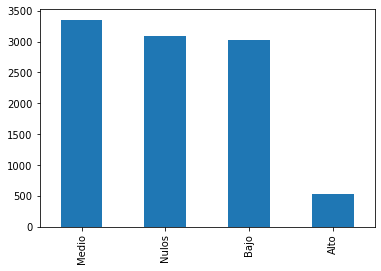

In [167]:
df_merge.flag_predictor.value_counts().plot.bar()

<AxesSubplot:>

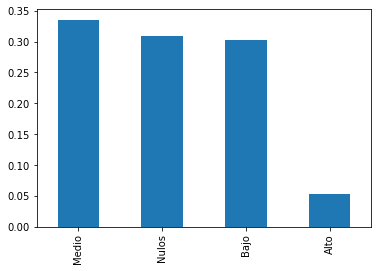

In [168]:
df_merge.flag_predictor.value_counts(normalize=True).plot.bar()

**- EXTRA: Usando cut**

In [169]:
bins = [-1,600,800,1000]
labels =['Bajo','Medio','Alto']

df_merge['flag_predictor_3'] = pd.cut(df_merge['predictor1_6'], bins = bins, labels = labels).astype('str')

In [170]:
df_merge.replace(
    {'flag_predictor_3': {'nan': 'Nulos'}},
    inplace = True
)

<AxesSubplot:>

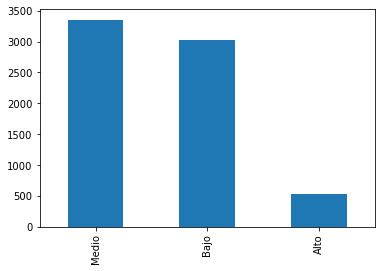

In [171]:
df_merge.flag_predictor_3.value_counts().plot.bar()

In [172]:
df_merge.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,predictor1_7,predictor1_8,predictor1_9,ignite_ise,mean_cant_tel,std_cant_tel,captacion_corregido,captacion_corregido_3,flag_predictor,flag_predictor_3
0,PlDKtWGFBg,201909.0,0.0,Rechazado,Básico,1.0,596.0,1.0,NORMAL,551.0,506.0,506.0,D,2.170590,1.951541,Básico,Básico,Bajo,Bajo
1,MOAbr9v9ac,201810.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,C3,3.038442,2.181354,Rápido,Rápido,Nulos,NaN
2,49L1vb3c2I,201909.0,1.0,Aprobado,Básico,3.0,633.0,0.0,NORMAL,544.0,675.0,675.0,D,2.170590,1.951541,Básico,Básico,Medio,Medio
3,7xM1iIFNCb,201812.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,E,3.038442,2.181354,Rápido,Rápido,Nulos,NaN
4,e2ayZYSD59,201809.0,1.0,Aprobado,Básico,0.0,NaN,0.0,NORMAL,100.0,NaN,100.0,E,2.170590,1.951541,Básico,Básico,Nulos,NaN


**EXTRA - Crear una columna que sea "nueva_col" la cual sea cada valor de la columna predictor 1_7 menos la resta del valor máximo de esa columna**.

Ejemplo, si el valor maximo de la columna predictor1_7 es 100, y en la primer fila tenemos el valor 80, el valor de esa fila para la nueva columna seria (80-100) = -20.

In [173]:
df_merge['nueva_col'] = df_merge['predictor1_7'] - df_merge['predictor1_7'].max()

df_merge.head()

,rut,periodo,ind_activo,estado_solicitud,captacion,cant_tel,predictor1_6,marca_60d_6m_final,captacion_nuevo,predictor1_7,predictor1_8,predictor1_9,ignite_ise,mean_cant_tel,std_cant_tel,captacion_corregido,captacion_corregido_3,flag_predictor,flag_predictor_3,nueva_col
0,PlDKtWGFBg,201909.0,0.0,Rechazado,Básico,1.0,596.0,1.0,NORMAL,551.0,506.0,506.0,D,2.170590,1.951541,Básico,Básico,Bajo,Bajo,-434.0
1,MOAbr9v9ac,201810.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,C3,3.038442,2.181354,Rápido,Rápido,Nulos,NaN,-885.0
2,49L1vb3c2I,201909.0,1.0,Aprobado,Básico,3.0,633.0,0.0,NORMAL,544.0,675.0,675.0,D,2.170590,1.951541,Básico,Básico,Medio,Medio,-441.0
3,7xM1iIFNCb,201812.0,1.0,Aprobado,Rápido,4.0,NaN,0.0,VOLDEMORTPRESS,100.0,NaN,100.0,E,3.038442,2.181354,Rápido,Rápido,Nulos,NaN,-885.0
4,e2ayZYSD59,201809.0,1.0,Aprobado,Básico,0.0,NaN,0.0,NORMAL,100.0,NaN,100.0,E,2.170590,1.951541,Básico,Básico,Nulos,NaN,-885.0
